# Coil Configuration Analysis

In [26]:
import numpy as np

In [27]:
import pandas as pd

In [28]:
import matplotlib.pyplot as plt

In [29]:
from itertools import product

## Functions for Calculations

In [30]:

def calculate_resistance(wattage, voltage):
    return (voltage ** 2) / wattage
    

In [31]:

def calculate_series_resistance(resistances):
    return np.sum(resistances)
    

In [32]:

def calculate_parallel_resistance(resistances):
    return 1 / np.sum(1 / resistances)
    

In [33]:

def calculate_power_draw(voltage, resistance):
    return (voltage ** 2) / resistance
    

In [34]:

def apply_derating(power):
    return power * 0.8
    

## Evaluate Coil Configurations

In [35]:
# Function to evaluate various coil configurations based on wattages, voltages, and other parameters.
def evaluate_coil_configurations(wattages, voltages, num_coils_per_group=4, num_groups=6, num_plates=2):
    # Initialize an empty list to hold the results
    results = []
    
    # Loop through each combination of wattage and voltage
    for wattage, voltage in product(wattages, voltages):
        # Calculate the resistance of the coil for the given wattage and voltage
        resistance = calculate_resistance(wattage, voltage)
        
        # Loop through different numbers of coils in series within a group
        for coils_in_series in [1, 2, 4]:
            # Calculate the number of coils in parallel within the group
            coils_in_parallel = num_coils_per_group // coils_in_series
            
            # Calculate total resistance for one group in both series and parallel configurations
            total_resistance_series_group = coils_in_series * resistance
            total_resistance_parallel_group = resistance / coils_in_parallel
            
            # Calculate total resistance for all groups and plates in both configurations
            total_resistance_series = total_resistance_series_group * num_groups * num_plates
            total_resistance_parallel = total_resistance_parallel_group * num_groups * num_plates
            
            # Calculate the power draw for both series and parallel configurations
            power_draw_series = calculate_power_draw(voltage, total_resistance_series)
            power_draw_parallel = calculate_power_draw(voltage, total_resistance_parallel)
            
            # Apply derating to the calculated power draw
            rated_power_series = apply_derating(power_draw_series)
            rated_power_parallel = apply_derating(power_draw_parallel)
            
            # Append the calculated values to the results list
            results.append({
                'Wattage': wattage,
                'Voltage': voltage,
                'Coils in Series': coils_in_series,
                'Total Resistance (Series)': total_resistance_series,
                'Total Resistance (Parallel)': total_resistance_parallel,
                'Power Draw (Series)': power_draw_series,
                'Power Draw (Parallel)': power_draw_parallel,
                'Rated Power (Series)': rated_power_series,
                'Rated Power (Parallel)': rated_power_parallel,
            })
    
    # Convert the results list into a DataFrame for easier analysis and visualization
    df_results = pd.DataFrame(results)
    
    # Plot the rated power against wattage for each voltage and number of coils in series
    for voltage in voltages:
        df_subset = df_results[df_results['Voltage'] == voltage]
        plt.figure(figsize=(12, 6))
        plt.title(f'Rated Power vs Wattage for {voltage}V')
        for coils_in_series in [1, 2, 4]:
            df_plot = df_subset[df_subset['Coils in Series'] == coils_in_series]
            plt.plot(df_plot['Wattage'], df_plot['Rated Power (Series)'], label=f'{coils_in_series} Coils in Series (Series)')
            plt.plot(df_plot['Wattage'], df_plot['Rated Power (Parallel)'], label=f'{coils_in_series} Coils in Series (Parallel)')
        plt.xlabel('Wattage (W)')
        plt.ylabel('Rated Power (W)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Return the results DataFrame
    return df_results


## Sample Usage

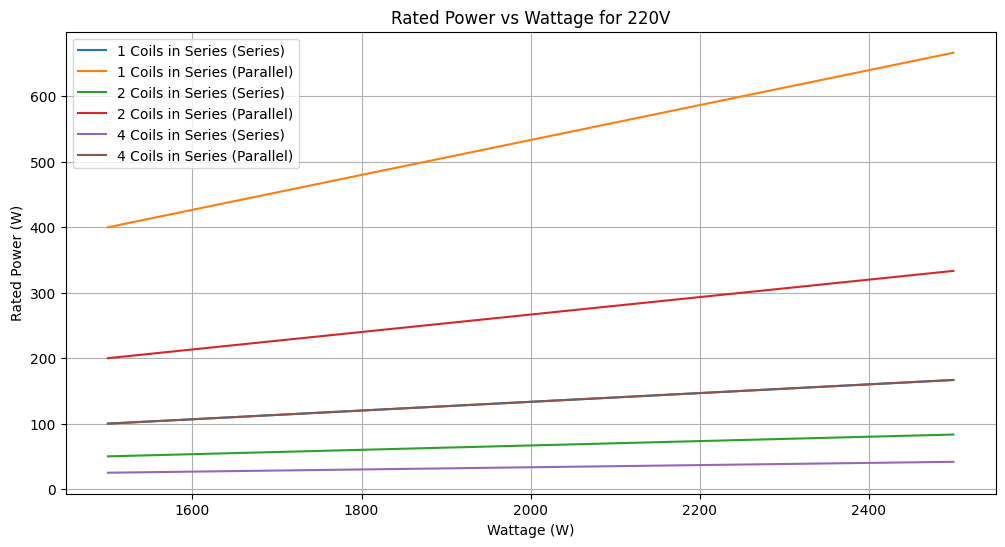

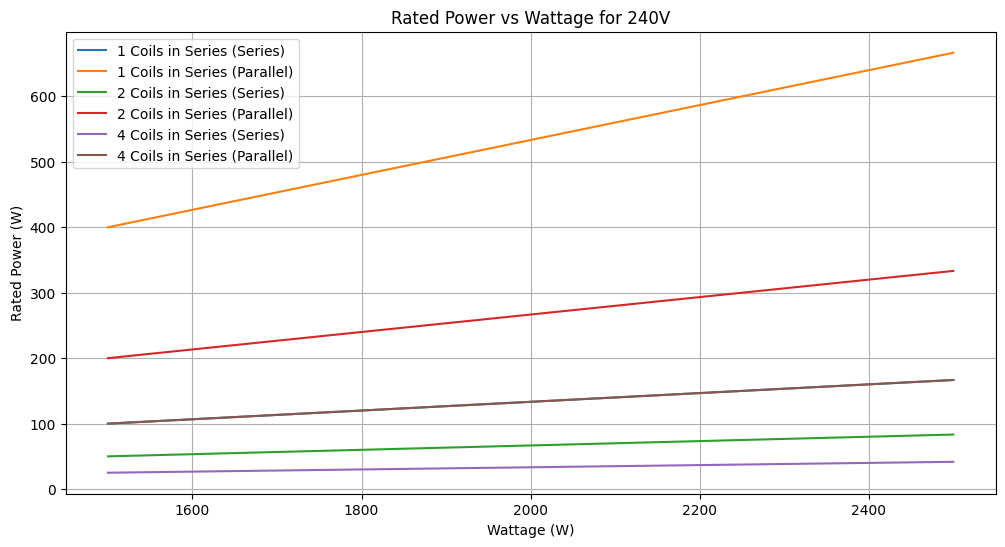

,Wattage,Voltage,Coils in Series,Total Resistance (Series),Total Resistance (Parallel),Power Draw (Series),Power Draw (Parallel),Rated Power (Series),Rated Power (Parallel)
0,1500,220,1,387.2,96.8,125.00,500.0,100.0,400.0
1,1500,220,2,774.4,193.6,62.50,250.0,50.0,200.0
2,1500,220,4,1548.8,387.2,31.25,125.0,25.0,100.0
3,1500,240,1,460.8,115.2,125.00,500.0,100.0,400.0
4,1500,240,2,921.6,230.4,62.50,250.0,50.0,200.0


In [36]:

sample_wattages = np.array([1500, 2000, 2500])
sample_voltages = np.array([220, 240])
df_results = evaluate_coil_configurations(sample_wattages, sample_voltages)
df_results.head()